### Referencias
 - https://markroxor.github.io/gensim/static/notebooks/annoytutorial.html
 - https://www.slideshare.net/erikbern/approximate-nearest-neighbor-methods-and-vector-models-nyc-ml-meetup
 - https://github.com/erikbern/ann-benchmarks

# Getting Started with Annoy

In [317]:
from annoy import AnnoyIndex
import matplotlib.pyplot as plt

> Create 1000 vectors from a random gaussian distribution

In [318]:
import random

f = 2
t = AnnoyIndex(f, 'euclidean')
n = 100

for i in range(n):
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)

> Random vector accessor for plotting purposes

In [319]:
random_v = lambda: t.get_item_vector(random.choice(range(n)))

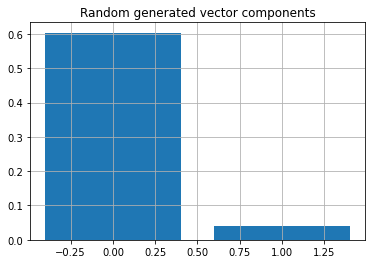

In [320]:
plt.title("Random generated vector components")
vector = random_v()
plt.bar(list(range(len(vector))), vector)
plt.grid(True)
plt.show()

> Plot of first 2 vectors

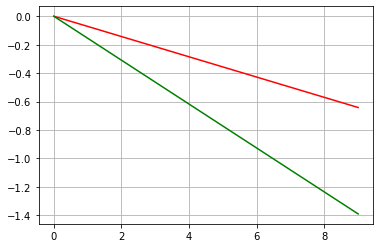

In [347]:
v1 = t.get_item_vector(0)
v2 = t.get_item_vector(1)
y = lambda x, a, b: (a/b) * x
x = np.arange(0, 1, 0.1)

plt.plot(y(x, v1[1], v1[0]), c="r")
plt.plot(y(x, v2[1], v2[0]), c="g")
plt.grid(True)
plt.show()

> Check that Euclidean distance given by Annoy is the same as Numpy's

In [322]:
annoy_euclidean_distance = round(float(t.get_distance(0, 1)), 3)

In [323]:
numpy_euclidean_distance = np.round(np.linalg.norm(np.array(v1)-np.array(v2)), 3)

In [324]:
print(f"Annoy: {annoy_euclidean_distance} | Numpy: {numpy_euclidean_distance}")

Annoy: 3.011 | Numpy: 3.011


> Get Nearest Neighbours

In [325]:
t.build(10) # 10 trees
t.save('test.ann')
ind = 0
u = AnnoyIndex(f, 'euclidean')
u.load('test.ann') # super fast, will just mmap the file
nearest_neighbors = u.get_nns_by_item(ind, 4)

In [327]:
nearest_neighbors

[0, 57, 36, 26]

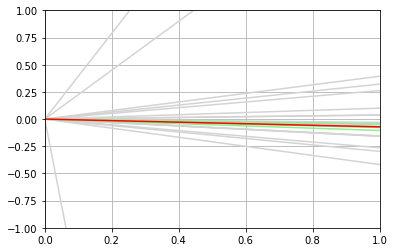

In [346]:
for nn in range(20):
    v = t.get_item_vector(nn)
    vector_line = lambda x, a, b: (a/b) * x
    x = np.arange(0, 1, 0.1)

    plt.plot(vector_line(x, v[1], v[0]), c="lightgray")
    plt.grid(True)

for nn in nearest_neighbors[1:]:
    v = t.get_item_vector(nn)
    vector_line = lambda x, a, b: (a/b) * x
    x = np.arange(0, 1, 0.1)

    plt.plot(vector_line(x, v[1], v[0]), c="lightgreen")
    plt.grid(True)

v = t.get_item_vector(ind)
vector_line = lambda x, a, b: (a/b) * x
x = np.arange(0, 1, 0.1)

plt.plot(vector_line(x, v[1], v[0]), c="red")
plt.grid(True)
    
plt.axis([0, 1, -1, 1])
plt.show()

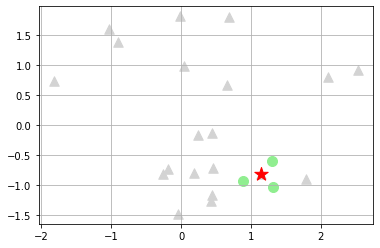

In [345]:
for nn in range(20):
    v = t.get_item_vector(nn)
    plt.scatter(v[0], v[1], c="lightgray", marker="^", s=90)
    plt.grid(True)

for nn in nearest_neighbors[1:]:
    v = t.get_item_vector(nn)
    plt.scatter(v[0], v[1], c="lightgreen", marker="o", s=100)
    plt.grid(True)

v = t.get_item_vector(ind)
plt.scatter(v[0], v[1], c="red", marker="*", s=200)
plt.grid(True)
plt.show()